In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow import keras

import cv2
import os
import glob

In [2]:
SIZE = 256
Train = glob.glob('/kaggle/input/plant-disease-recognition-dataset/Train/Train/*')

train_images = []
train_labels = []

for directory_path in Train:
    label = directory_path.split("\\")[-1]
    for image_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(image_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        
        train_images.append(img)
        train_labels.append(label)

In [3]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [4]:
train_images.shape

(1322, 256, 256, 3)

In [5]:
Test = glob.glob('/kaggle/input/plant-disease-recognition-dataset/Test/Test/*')

test_images = []
test_labels = [] 

for directory_path in Test:
    label = directory_path.split("\\")[-1]
    for image_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(image_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        
        test_images.append(img)
        test_labels.append(label)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [6]:
Val = glob.glob('/kaggle/input/plant-disease-recognition-dataset/Validation/Validation/*')

val_images = []
val_labels = [] 

for directory_path in Test:
    label = directory_path.split("\\")[-1]
    for image_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(image_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        
        val_images.append(img)
        val_labels.append(label)

val_images = np.array(val_images)
val_labels = np.array(val_labels)

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)
le.fit(val_labels)
val_labels_encoded = le.transform(val_labels)

In [8]:
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [9]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [10]:
from keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [11]:
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import os
import seaborn as sns

In [12]:
activation = 'sigmoid'

feature_extractor_sequential = Sequential([
    Conv2D(32, 3, activation = activation, padding = 'same', input_shape = (SIZE, SIZE, 3)),
    BatchNormalization(),
    
    Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'),
    BatchNormalization(),
    MaxPooling2D(),
    
    Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'),
    BatchNormalization(),
    
    Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'),
    BatchNormalization(),
    MaxPooling2D(),
    
    Flatten()
])

In [13]:
x = feature_extractor_sequential.output  
x = Dense(256, activation = activation, kernel_initializer = 'he_uniform')(x)
prediction_layer = Dense(3, activation = 'softmax')(x)

In [14]:
cnn_model = Model(inputs=feature_extractor_sequential.input, outputs=prediction_layer)
cnn_model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(cnn_model.summary()) 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 256, 256, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0     

In [15]:
history = cnn_model.fit(x_train, y_train_one_hot, epochs=50, validation_data = (x_test, y_test_one_hot))

Epoch 1/50
42/42 [==============================] - 17s 236ms/step - loss: 1.5634 - accuracy: 0.6528 - val_loss: 2.2861 - val_accuracy: 0.3333
Epoch 2/50
42/42 [==============================] - 7s 176ms/step - loss: 0.5273 - accuracy: 0.7980 - val_loss: 2.0054 - val_accuracy: 0.3333
Epoch 3/50
42/42 [==============================] - 7s 177ms/step - loss: 0.4477 - accuracy: 0.8283 - val_loss: 1.9905 - val_accuracy: 0.3333
Epoch 4/50
42/42 [==============================] - 8s 179ms/step - loss: 0.4234 - accuracy: 0.8404 - val_loss: 3.2993 - val_accuracy: 0.3400
Epoch 5/50
42/42 [==============================] - 7s 178ms/step - loss: 0.3854 - accuracy: 0.8593 - val_loss: 1.4961 - val_accuracy: 0.3467
Epoch 6/50
42/42 [==============================] - 8s 179ms/step - loss: 0.3805 - accuracy: 0.8578 - val_loss: 1.2078 - val_accuracy: 0.5333
Epoch 7/50
42/42 [==============================] - 8s 180ms/step - loss: 0.3387 - accuracy: 0.8797 - val_loss: 1.0128 - val_accuracy: 0.5267
Epoch

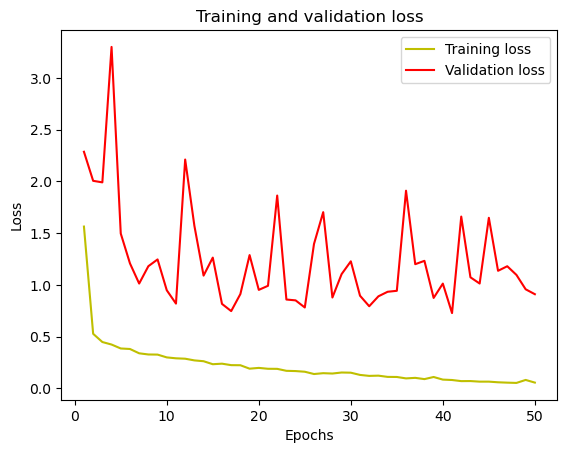

In [16]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


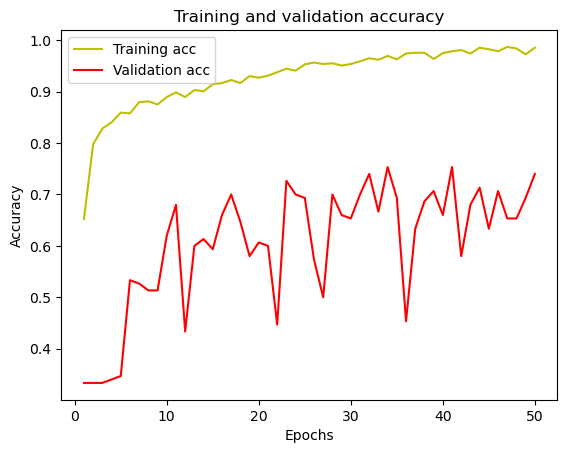

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
prediction_NN = cnn_model.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = le.inverse_transform(prediction_NN)

5/5 [==============================] - 0s 58ms/step


[[37  5  8]
 [ 1 47  2]
 [21  2 27]]


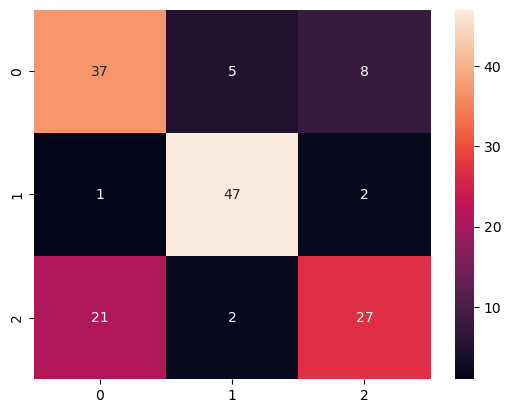

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, prediction_NN)
print(cm)
sns.heatmap(cm, annot=True)
plt.show()

1/1 [==============================] - 0s 222ms/step
The prediction for this image is:  ['/kaggle/input/plant-disease-recognition-dataset/Test/Test/Rust']
The actual label for this image is:  /kaggle/input/plant-disease-recognition-dataset/Test/Test/Healthy


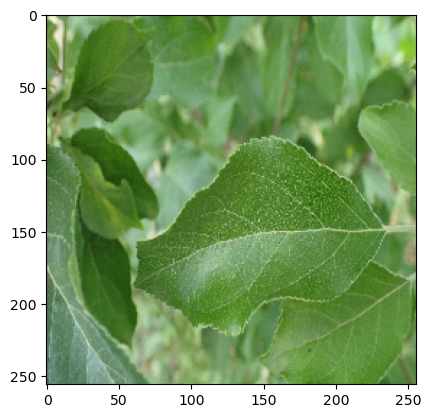

In [20]:
n=15
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
prediction = np.argmax(cnn_model.predict(input_img))  #argmax to convert categorical back to original
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

1/1 [==============================] - 0s 23ms/step
The prediction for this image is:  ['/kaggle/input/plant-disease-recognition-dataset/Test/Test/Healthy']
The actual label for this image is:  /kaggle/input/plant-disease-recognition-dataset/Test/Test/Healthy


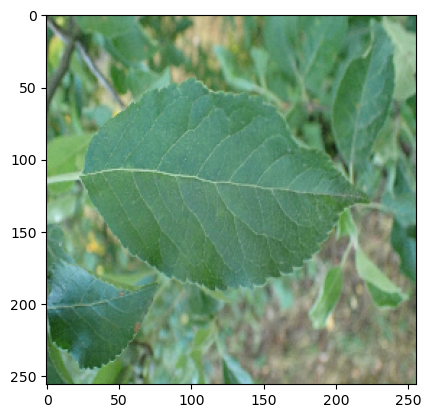

In [21]:
n=10
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
prediction = np.argmax(cnn_model.predict(input_img))  #argmax to convert categorical back to original
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

**Create the Random Forest**

In [23]:
## use predicted data from CNN
X_data = feature_extractor_sequential.predict(x_train)

#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

42/42 [==============================] - 2s 49ms/step


In [25]:
RF_model.fit(X_data, y_train) 

X_test_feature = feature_extractor_sequential.predict(x_test)

prediction_RF = RF_model.predict(X_test_feature)

prediction_RF = le.inverse_transform(prediction_RF)

5/5 [==============================] - 0s 59ms/step


Accuracy =  0.7533333333333333


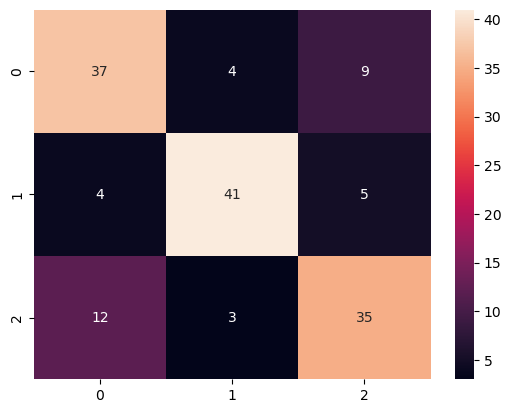

In [27]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))


cm = confusion_matrix(test_labels, prediction_RF)
sns.heatmap(cm, annot=True)
plt.show()

1/1 [==============================] - 0s 36ms/step
The prediction for this image is:  ['/kaggle/input/plant-disease-recognition-dataset/Test/Test/Healthy']
The actual label for this image is:  /kaggle/input/plant-disease-recognition-dataset/Test/Test/Healthy


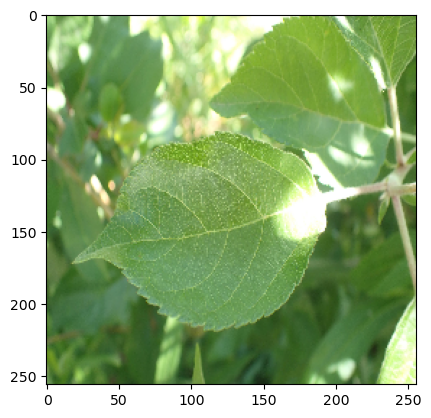

In [28]:
n=9 
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) 
input_img_features=feature_extractor_sequential.predict(input_img)
prediction_RF = RF_model.predict(input_img_features)[0] 
prediction_RF = le.inverse_transform([prediction_RF])  
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_labels[n])
